In [1]:
import numpy as np
import pandas as pd
import torch
import os
import matplotlib.pyplot as plt

d:\Program Files\anaconda3\envs\torch126\Lib\site-packages\torch\cuda\__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


In [2]:
import sys
sys.path.append("D:\\0626_temp")

from flare_preprocessing import *
from utilities import *


In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
opr = opr_data_preprocessing("ftp_20100101_20251115.csv")

Shape of the operation data: (29871, 9)


D:\0626_temp\utilities.py:64: RuntimeWarning: divide by zero encountered in log10
  return np.log10(intensity * 10 ** -8)


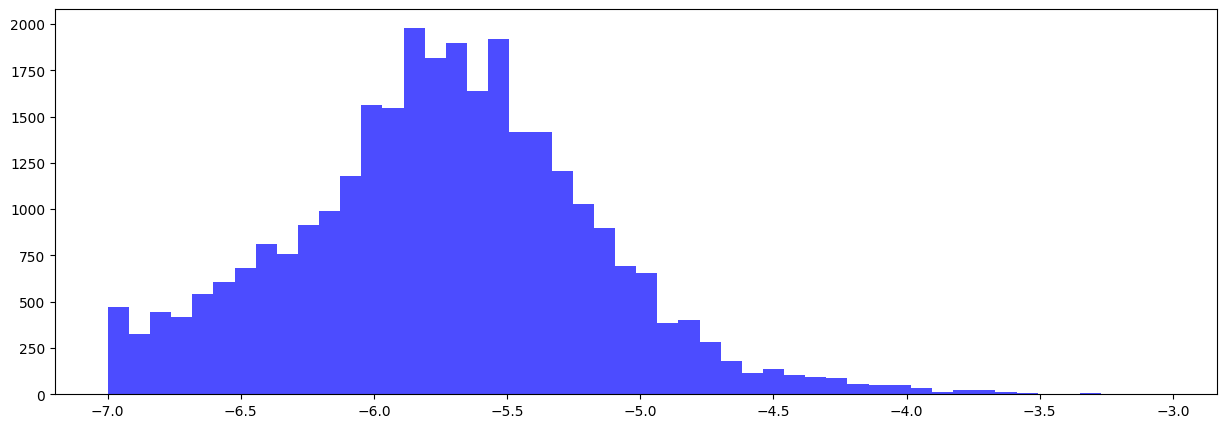

In [9]:
plt.figure(figsize=(15,5))
plt.hist(opr['log_intensity'], bins=50, color='blue', alpha=0.7)
plt.show()

## Definitive SHARP

In [10]:
# read the parquet file
import fastparquet
high_qual_sharp = pd.read_parquet('D:\\0626_temp\\processed_high-qual_near-center-70_no-nas_flares.parquet', engine='fastparquet')

In [11]:
len(high_qual_sharp)

3974765

In [12]:
from New_SampleConstruction import *

In [13]:
high_qual_sharp['HARPNUM'].unique()

<IntegerArray>
[    1,     2,     5,     6,     8,    10,    11,    12,    14,    15,
 ...
 11550, 11556, 11557, 11561, 11562, 11564, 11568, 11569, 11570, 11571]
Length: 6017, dtype: Int64

In [36]:
high_qual_sharp[high_qual_sharp['HARPNUM'] == 1]

,HARPNUM,T_REC,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,...,T_FRST1,T_LAST1,NOAA_AR,NOAA_NUM,NOAA_ARS,start time,peak time,end time,flare_class,peak_intensity
0,1,2010-05-01 14:00:00+00:00,5.827622e+21,23.887000,73.347000,77.564000,31.354000,-0.151826,4.860817e+12,0.000398,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,None,NaN
1,1,2010-05-01 14:12:00+00:00,5.768150e+21,24.708000,71.970000,76.249000,31.197000,-0.226835,4.908301e+12,0.000081,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,None,NaN
2,1,2010-05-01 14:24:00+00:00,5.865157e+21,25.657000,74.254000,82.154000,32.748000,-0.260023,5.577384e+12,-0.009573,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,None,NaN
3,1,2010-05-01 14:36:00+00:00,5.854875e+21,25.242000,74.539000,81.896000,33.026000,-0.199640,5.290721e+12,-0.013852,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,None,NaN
4,1,2010-05-01 14:48:00+00:00,5.854465e+21,25.876000,75.671000,85.297000,33.556000,-0.403703,5.911234e+12,-0.012455,...,2010-05-01 00:00:00+00:00,2010-05-11 16:12:00+00:00,11067,1,11067,NaT,NaT,NaT,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1,2010-05-11 15:24:00+00:00,2.522491e+21,19.498467,68.526333,68.791133,21.268133,-0.187829,1.926083e+12,-0.007622,...,NaT,NaT,<NA>,<NA>,None,NaT,NaT,NaT,None,NaN
1208,1,2010-05-11 15:36:00+00:00,2.516466e+21,19.467100,68.327500,68.593100,21.268600,-0.186016,1.914007e+12,-0.007523,...,NaT,NaT,<NA>,<NA>,None,NaT,NaT,NaT,None,NaN
1209,1,2010-05-11 15:48:00+00:00,2.510441e+21,19.435733,68.128667,68.395067,21.269067,-0.184204,1.901931e+12,-0.007425,...,NaT,NaT,<NA>,<NA>,None,NaT,NaT,NaT,None,NaN
1210,1,2010-05-11 16:00:00+00:00,2.504415e+21,19.404367,67.929833,68.197033,21.269533,-0.182391,1.889856e+12,-0.007327,...,NaT,NaT,<NA>,<NA>,None,NaT,NaT,NaT,None,NaN


In [25]:
nowcasting_obj_24 = New_SampleConstruction()
nowcasting_obj_24.samples_from_harp(opr, high_qual_sharp, lead_window=0, forecasting_window=24)

Processing HARPNUM: 1
Processing HARPNUM: 2
Processing HARPNUM: 5
Processing HARPNUM: 6
Processing HARPNUM: 8
Processing HARPNUM: 10
Processing HARPNUM: 11
Processing HARPNUM: 12
Processing HARPNUM: 14
Processing HARPNUM: 15
Processing HARPNUM: 16
Processing HARPNUM: 17
Processing HARPNUM: 19
Processing HARPNUM: 20
Processing HARPNUM: 23
Processing HARPNUM: 24
Processing HARPNUM: 25
Processing HARPNUM: 26
Processing HARPNUM: 29
Processing HARPNUM: 32
Processing HARPNUM: 35
Processing HARPNUM: 36
Processing HARPNUM: 37
Processing HARPNUM: 38
Processing HARPNUM: 39
Processing HARPNUM: 40
Processing HARPNUM: 41
Processing HARPNUM: 43
Processing HARPNUM: 44
Processing HARPNUM: 45
Processing HARPNUM: 46
Processing HARPNUM: 47
Processing HARPNUM: 49
Processing HARPNUM: 50
Processing HARPNUM: 51
Processing HARPNUM: 53
Processing HARPNUM: 54
Processing HARPNUM: 57
Processing HARPNUM: 58
Processing HARPNUM: 59
Processing HARPNUM: 62
Processing HARPNUM: 66
Processing HARPNUM: 67
Processing HARPN

D:\0626_temp\New_SampleConstruction.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oneharp['T_REC'] = pd.to_datetime(oneharp['T_REC'])


Processing HARPNUM: 10876
Processing HARPNUM: 10879
Processing HARPNUM: 10880
Processing HARPNUM: 10882
Processing HARPNUM: 10884
Processing HARPNUM: 10885
Processing HARPNUM: 10889
Processing HARPNUM: 10894
Processing HARPNUM: 10895
Processing HARPNUM: 10897
Processing HARPNUM: 10899
Processing HARPNUM: 10900
Processing HARPNUM: 10902
Processing HARPNUM: 10903
Processing HARPNUM: 10907
Processing HARPNUM: 10911
Processing HARPNUM: 10913
Processing HARPNUM: 10915
Processing HARPNUM: 10921
Processing HARPNUM: 10922
Processing HARPNUM: 10923
Processing HARPNUM: 10924
Processing HARPNUM: 10927
Processing HARPNUM: 10928
Processing HARPNUM: 10930
Processing HARPNUM: 10931
Processing HARPNUM: 10933
Processing HARPNUM: 10938
Processing HARPNUM: 10940
Processing HARPNUM: 10941
Processing HARPNUM: 10942
Processing HARPNUM: 10943
Processing HARPNUM: 10944
Processing HARPNUM: 10945
Processing HARPNUM: 10948
Processing HARPNUM: 10949
Processing HARPNUM: 10950
Processing HARPNUM: 10951
Processing H

In [11]:
nowcasting_obj_12 = New_SampleConstruction()
nowcasting_obj_12.samples_from_harp(opr, high_qual_sharp, lead_window=0, forecasting_window=12)

Processing HARPNUM: 1
Processing HARPNUM: 2
Processing HARPNUM: 5
Processing HARPNUM: 6
Processing HARPNUM: 8
Processing HARPNUM: 10
Processing HARPNUM: 11
Processing HARPNUM: 12
Processing HARPNUM: 14
Processing HARPNUM: 15
Processing HARPNUM: 16
Processing HARPNUM: 17
Processing HARPNUM: 19
Processing HARPNUM: 20
Processing HARPNUM: 23
Processing HARPNUM: 24
Processing HARPNUM: 25
Processing HARPNUM: 26
Processing HARPNUM: 29
Processing HARPNUM: 32
Processing HARPNUM: 35
Processing HARPNUM: 36
Processing HARPNUM: 37
Processing HARPNUM: 38
Processing HARPNUM: 39
Processing HARPNUM: 40
Processing HARPNUM: 41
Processing HARPNUM: 43
Processing HARPNUM: 44
Processing HARPNUM: 45
Processing HARPNUM: 46
Processing HARPNUM: 47
Processing HARPNUM: 49
Processing HARPNUM: 50
Processing HARPNUM: 51
Processing HARPNUM: 53
Processing HARPNUM: 54
Processing HARPNUM: 57
Processing HARPNUM: 58
Processing HARPNUM: 59
Processing HARPNUM: 62
Processing HARPNUM: 66
Processing HARPNUM: 67
Processing HARPN

D:\0626_temp\New_SampleConstruction.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oneharp['T_REC'] = pd.to_datetime(oneharp['T_REC'])


Processing HARPNUM: 10876
Processing HARPNUM: 10879
Processing HARPNUM: 10880
Processing HARPNUM: 10882
Processing HARPNUM: 10884
Processing HARPNUM: 10885
Processing HARPNUM: 10889
Processing HARPNUM: 10894
Processing HARPNUM: 10895
Processing HARPNUM: 10897
Processing HARPNUM: 10899
Processing HARPNUM: 10900
Processing HARPNUM: 10902
Processing HARPNUM: 10903
Processing HARPNUM: 10907
Processing HARPNUM: 10911
Processing HARPNUM: 10913
Processing HARPNUM: 10915
Processing HARPNUM: 10921
Processing HARPNUM: 10922
Processing HARPNUM: 10923
Processing HARPNUM: 10924
Processing HARPNUM: 10927
Processing HARPNUM: 10928
Processing HARPNUM: 10930
Processing HARPNUM: 10931
Processing HARPNUM: 10933
Processing HARPNUM: 10938
Processing HARPNUM: 10940
Processing HARPNUM: 10941
Processing HARPNUM: 10942
Processing HARPNUM: 10943
Processing HARPNUM: 10944
Processing HARPNUM: 10945
Processing HARPNUM: 10948
Processing HARPNUM: 10949
Processing HARPNUM: 10950
Processing HARPNUM: 10951
Processing H

In [12]:
nowcasting_obj_6 = New_SampleConstruction()
nowcasting_obj_6.samples_from_harp(opr, high_qual_sharp, lead_window=0, forecasting_window=6)

Processing HARPNUM: 1
Processing HARPNUM: 2
Processing HARPNUM: 5
Processing HARPNUM: 6
Processing HARPNUM: 8
Processing HARPNUM: 10
Processing HARPNUM: 11
Processing HARPNUM: 12
Processing HARPNUM: 14
Processing HARPNUM: 15
Processing HARPNUM: 16
Processing HARPNUM: 17
Processing HARPNUM: 19
Processing HARPNUM: 20
Processing HARPNUM: 23
Processing HARPNUM: 24
Processing HARPNUM: 25
Processing HARPNUM: 26
Processing HARPNUM: 29
Processing HARPNUM: 32
Processing HARPNUM: 35
Processing HARPNUM: 36
Processing HARPNUM: 37
Processing HARPNUM: 38
Processing HARPNUM: 39
Processing HARPNUM: 40
Processing HARPNUM: 41
Processing HARPNUM: 43
Processing HARPNUM: 44
Processing HARPNUM: 45
Processing HARPNUM: 46
Processing HARPNUM: 47
Processing HARPNUM: 49
Processing HARPNUM: 50
Processing HARPNUM: 51
Processing HARPNUM: 53
Processing HARPNUM: 54
Processing HARPNUM: 57
Processing HARPNUM: 58
Processing HARPNUM: 59
Processing HARPNUM: 62
Processing HARPNUM: 66
Processing HARPNUM: 67
Processing HARPN

D:\0626_temp\New_SampleConstruction.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oneharp['T_REC'] = pd.to_datetime(oneharp['T_REC'])


Processing HARPNUM: 10876
Processing HARPNUM: 10879
Processing HARPNUM: 10880
Processing HARPNUM: 10882
Processing HARPNUM: 10884
Processing HARPNUM: 10885
Processing HARPNUM: 10889
Processing HARPNUM: 10894
Processing HARPNUM: 10895
Processing HARPNUM: 10897
Processing HARPNUM: 10899
Processing HARPNUM: 10900
Processing HARPNUM: 10902
Processing HARPNUM: 10903
Processing HARPNUM: 10907
Processing HARPNUM: 10911
Processing HARPNUM: 10913
Processing HARPNUM: 10915
Processing HARPNUM: 10921
Processing HARPNUM: 10922
Processing HARPNUM: 10923
Processing HARPNUM: 10924
Processing HARPNUM: 10927
Processing HARPNUM: 10928
Processing HARPNUM: 10930
Processing HARPNUM: 10931
Processing HARPNUM: 10933
Processing HARPNUM: 10938
Processing HARPNUM: 10940
Processing HARPNUM: 10941
Processing HARPNUM: 10942
Processing HARPNUM: 10943
Processing HARPNUM: 10944
Processing HARPNUM: 10945
Processing HARPNUM: 10948
Processing HARPNUM: 10949
Processing HARPNUM: 10950
Processing HARPNUM: 10951
Processing H

In [13]:
from New_lstm2 import *

Bootstrap iteration 1/30
Epoch 1, avg loss: 0.7987522870902247
Epoch 2, avg loss: 0.6190827372890191
Epoch 3, avg loss: 0.5752156670861597
Epoch 4, avg loss: 0.5564857957347128
Epoch 5, avg loss: 0.5351099591927241
Epoch 6, avg loss: 0.5178893746545651
Epoch 7, avg loss: 0.4966748890860769
Epoch 8, avg loss: 0.4900103370415284
Epoch 9, avg loss: 0.5241754591064965
Epoch 10, avg loss: 0.4956790182814502
Epoch 11, avg loss: 0.46134080652822584
Epoch 12, avg loss: 0.45265483676187146
Epoch 13, avg loss: 0.4386123079781564
Epoch 14, avg loss: 0.43188416497819376
Epoch 15, avg loss: 0.5201901679471035
Bootstrap iteration 2/30
Epoch 1, avg loss: 0.7855590989925717
Epoch 2, avg loss: 0.6032497432807948
Epoch 3, avg loss: 0.5684556082991146
Epoch 4, avg loss: 0.5452223422143283
Epoch 5, avg loss: 0.5171767903254336
Epoch 6, avg loss: 0.5072034809413373
Epoch 7, avg loss: 0.4892165655857765
Epoch 8, avg loss: 0.4645669902331077
Epoch 9, avg loss: 0.4572129109561843
Epoch 10, avg loss: 0.4592956

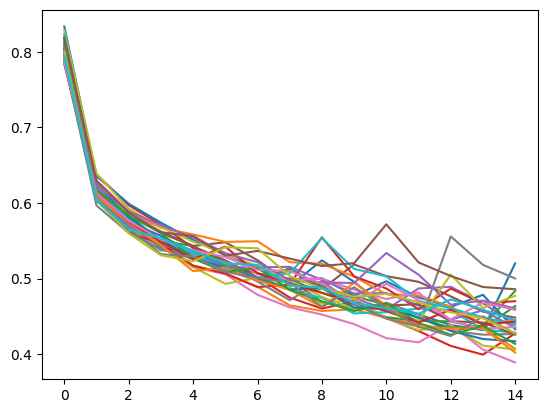

The 95% CI for threshold is 0.35000000000000003 - 0.56375
The 95% CI for TSS is 0.7464792644638175 - 0.807058198195452

[Resource Summary for 30 bootstrapped LSTM models]
Total training time: 2850.30 seconds
Max CPU memory used: 15075.57 MB
Max GPU memory used: 1009.53 MB


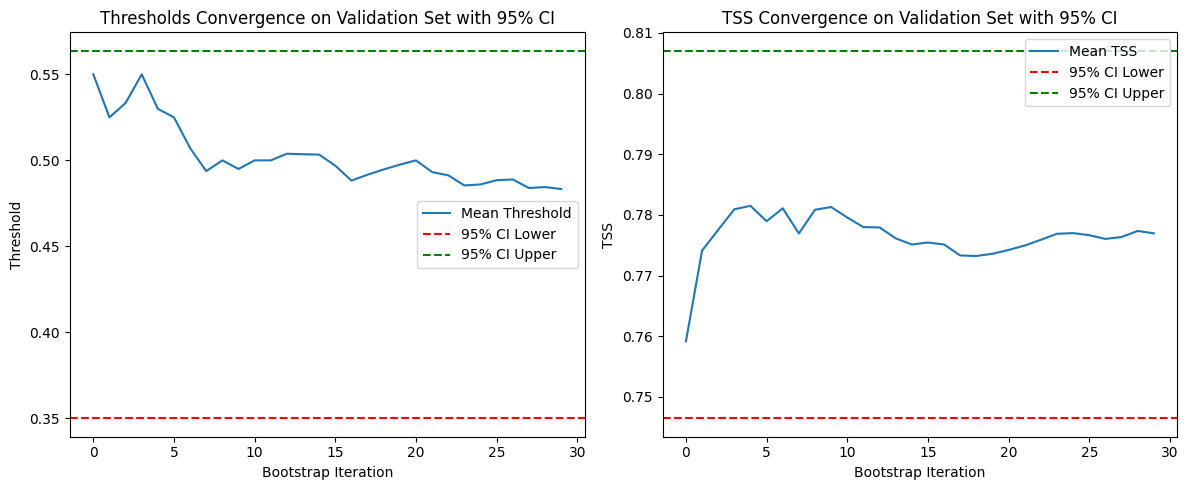

In [14]:
lead0_Mplus_24_whole = train_lstm()
lead0_Mplus_24_whole.train(nowcasting_obj_24.inputs_profile, nowcasting_obj_24.labels, "Mplus_train", pd.to_datetime('2010-01-01'), pd.to_datetime('2020-01-01'),n_epoch=15)

In [90]:
save_dir = ".\\LSTM_models\\Opr_dftSHARP"

In [17]:
for i, model in enumerate(lead0_Mplus_24_whole.models):
    os.makedirs(save_dir, exist_ok=True)
    model_path = os.path.join(save_dir, f"lead0_Mplus_24_whole{i}.pth")
    torch.save(model.state_dict(), model_path)

Bootstrap iteration 1/30
Epoch 1, avg loss: 0.9058797657489777
Epoch 2, avg loss: 0.6870070277498319
Epoch 3, avg loss: 0.634351808577776
Epoch 4, avg loss: 0.6027010951477748
Epoch 5, avg loss: 0.5965079329907894
Epoch 6, avg loss: 0.5929958682793838
Epoch 7, avg loss: 0.5548926755212821
Epoch 8, avg loss: 0.544234634591983
Epoch 9, avg loss: 0.5280648613205323
Epoch 10, avg loss: 0.5159212253414668
Epoch 11, avg loss: 0.5100830042591462
Epoch 12, avg loss: 0.49560851890307206
Epoch 13, avg loss: 0.4980431158955281
Epoch 14, avg loss: 0.47268438482513797
Epoch 15, avg loss: 0.45105990452262074
Bootstrap iteration 2/30
Epoch 1, avg loss: 0.8885374166644536
Epoch 2, avg loss: 0.6833789360064727
Epoch 3, avg loss: 0.6470007735949296
Epoch 4, avg loss: 0.6196539628391082
Epoch 5, avg loss: 0.5955663675872179
Epoch 6, avg loss: 0.5840761225957137
Epoch 7, avg loss: 0.5730060863380249
Epoch 8, avg loss: 0.5632612112049873
Epoch 9, avg loss: 0.5291111595355548
Epoch 10, avg loss: 0.523734528

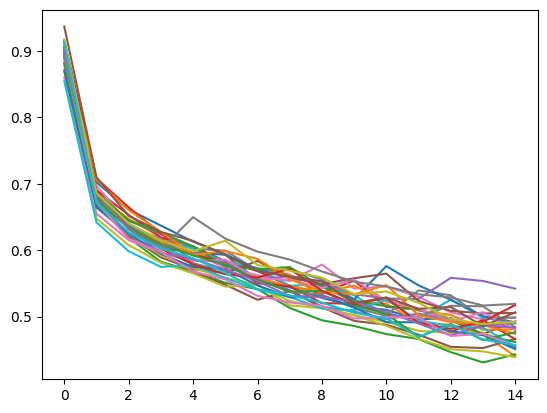

The 95% CI for threshold is 0.35000000000000003 - 0.66375
The 95% CI for TSS is 0.7148977264992172 - 0.7867234191001292

[Resource Summary for 30 bootstrapped LSTM models]
Total training time: 885.19 seconds
Max CPU memory used: 5844.55 MB
Max GPU memory used: 4053.53 MB


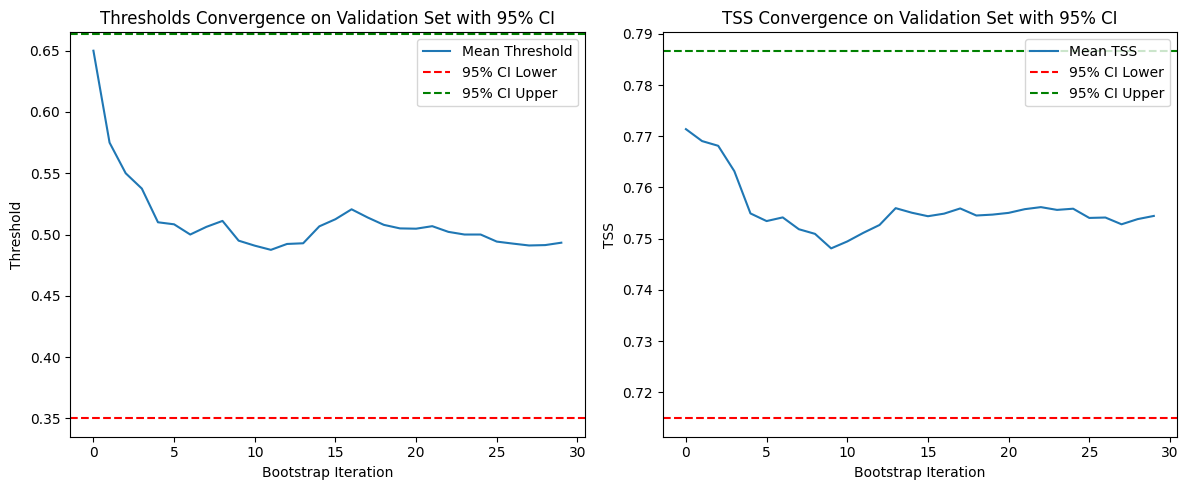

In [23]:
lead0_Mplus_12_whole = train_lstm()
lead0_Mplus_12_whole.train(nowcasting_obj_12.inputs_profile, nowcasting_obj_12.labels, "Mplus_train", pd.to_datetime('2010-01-01'), pd.to_datetime('2020-01-01'),n_epoch=15)

In [24]:
for i, model in enumerate(lead0_Mplus_12_whole.models):
    model_path = os.path.join(save_dir, f"lead0_Mplus_12_whole{i}.pth")
    torch.save(model.state_dict(), model_path)

Bootstrap iteration 1/30
Epoch 1, avg loss: 0.9666436483610922
Epoch 2, avg loss: 0.765341314806867
Epoch 3, avg loss: 0.713272719685711
Epoch 4, avg loss: 0.6885519147808872
Epoch 5, avg loss: 0.6648820780996066
Epoch 6, avg loss: 0.6419197992602391
Epoch 7, avg loss: 0.6148386575392822
Epoch 8, avg loss: 0.6098138925744526
Epoch 9, avg loss: 0.5933191002304874
Epoch 10, avg loss: 0.5863986122074412
Epoch 11, avg loss: 0.5877765239174686
Epoch 12, avg loss: 0.5647130853204585
Epoch 13, avg loss: 0.5716602873446336
Epoch 14, avg loss: 0.5571518264599701
Epoch 15, avg loss: 0.5648916288098292
Bootstrap iteration 2/30
Epoch 1, avg loss: 1.0363061899569497
Epoch 2, avg loss: 0.8046304405625186
Epoch 3, avg loss: 0.7288339320403426
Epoch 4, avg loss: 0.692796232540216
Epoch 5, avg loss: 0.6540536004215923
Epoch 6, avg loss: 0.6314516663551331
Epoch 7, avg loss: 0.6389213128766017
Epoch 8, avg loss: 0.6090498824617756
Epoch 9, avg loss: 0.5958533994297484
Epoch 10, avg loss: 0.5783236062348

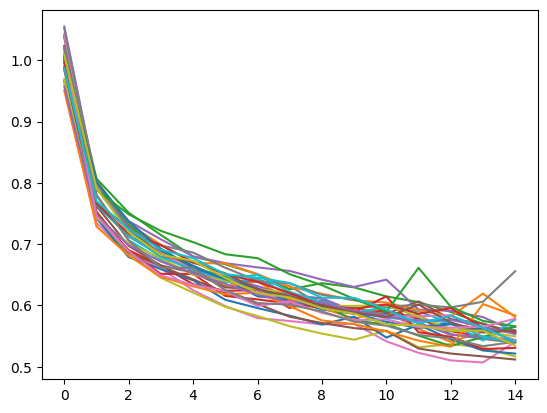

The 95% CI for threshold is 0.2 - 0.6000000000000001
The 95% CI for TSS is 0.6332604940404215 - 0.7086416047676628

[Resource Summary for 30 bootstrapped LSTM models]
Total training time: 625.93 seconds
Max CPU memory used: 6114.81 MB
Max GPU memory used: 4055.53 MB


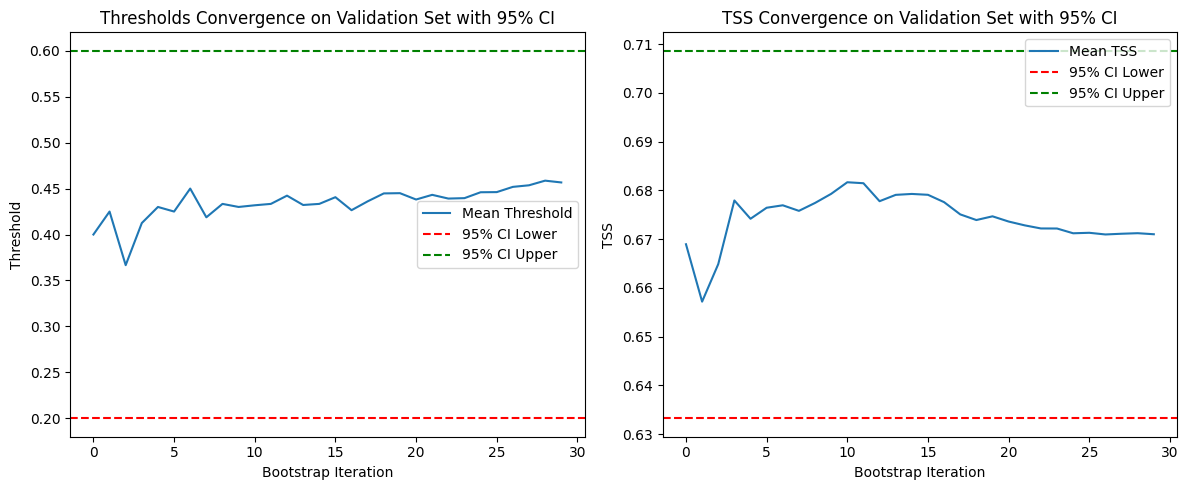

In [25]:
lead0_Mplus_6_whole = train_lstm()
lead0_Mplus_6_whole.train(nowcasting_obj_6.inputs_profile, nowcasting_obj_6.labels, "Mplus_train", pd.to_datetime('2010-01-01'), pd.to_datetime('2020-01-01'),n_epoch=15)

In [26]:
for i, model in enumerate(lead0_Mplus_6_whole.models):
    model_path = os.path.join(save_dir, f"lead0_Mplus_6_whole{i}.pth")
    torch.save(model.state_dict(), model_path)

In [97]:
def GenScripts(model_name, model_obj, sample_obj, time1, time2, model_dir):
    #!!!!Note, the threshold is not saved
    te_pos_inputs,te_neg_inputs = get_samples(sample_obj.inputs_profile, sample_obj.labels, "Mplus_test",  time1, time2)
    print(f"Positive: {te_pos_inputs.shape[0]}, Negative: {te_neg_inputs.shape[0]}")
    te_inputs, te_targets = combine(te_pos_inputs, te_neg_inputs)
    te_inputs = normalize2(te_inputs, te_inputs.copy())
    inputs_tensor = torch.from_numpy(te_inputs).float().to(DEVICE)
    pods = []; fars = []; tsss = []; hsss = []; f1s = []
    for i in range(30):
        thresh_i = model_obj.thresholds[i]
        path = os.path.join(model_dir, model_name+f"{i}.pth")
        model = lstm(te_inputs.shape[2]).to(DEVICE)
        state_dict = torch.load(path, map_location=DEVICE, weights_only=True)
        model.load_state_dict(state_dict)
        model.eval()
        with torch.no_grad():
            out = model(inputs_tensor)
            out = torch.sigmoid(out)
        y_pred_i = out.cpu().numpy().squeeze()
        y_pred_i = (y_pred_i > thresh_i).astype(int)
        tsss.append(TSS(y_pred_i, te_targets))
        pods.append(POD(y_pred_i, te_targets))
        fars.append(FAR(y_pred_i, te_targets))
        hsss.append(HSS(y_pred_i, te_targets))
        f1s.append(F1(y_pred_i, te_targets))
    pods = np.array(pods); fars = np.array(fars); tsss = np.array(tsss); hsss = np.array(hsss); f1s = np.array(f1s)
    print(f"TSS: {np.array(tsss).mean():.2f}[{np.array(tsss).min():.2f},{np.array(tsss).max():.2f}]")
    print(f"HSS: {np.array(hsss).mean():.2f}[{np.array(hsss).min():.2f},{np.array(hsss).max():.2f}]")
    print(f"POD: {np.array(pods).mean():.2f}[{np.array(pods).min():.2f},{np.array(pods).max():.2f}]")
    print(f"F1: {np.array(f1s).mean():.2f}[{np.array(f1s).min():.2f},{np.array(f1s).max():.2f}]")
    print(f"FAR: {np.array(fars).mean():.2f}[{np.array(fars).min():.2f},{np.array(fars).max():.2f}]")
    return tsss, hsss, pods, f1s, fars

### lead0, 24

In [35]:
tsss, hsss, pods, f1s, fars = GenScripts("lead0_Mplus_24_whole", lead0_Mplus_24_whole, nowcasting_obj_24, pd.to_datetime('2020-01-01'), pd.to_datetime('2022-01-01'), save_dir)

Positive: 138, Negative: 2446
TSS: 0.57[0.38,0.70]
HSS: 0.19[0.13,0.24]
POD: 0.83[0.64,0.95]
F1: 0.26[0.21,0.30]
FAR: 0.26[0.20,0.29]


In [20]:
tsss, hsss, pods, f1s, fars = GenScripts("lead0_Mplus_24_whole", lead0_Mplus_24_whole, nowcasting_obj_24, pd.to_datetime('2022-01-01'), pd.to_datetime('2023-01-01'), save_dir)

Positive: 707, Negative: 1149
TSS: 0.58[0.53,0.64]
HSS: 0.61[0.56,0.67]
POD: 0.64[0.57,0.73]
F1: 0.73[0.70,0.78]
FAR: 0.06[0.02,0.11]


In [21]:
tsss, hsss, pods, f1s, fars = GenScripts("lead0_Mplus_24_whole", lead0_Mplus_24_whole, nowcasting_obj_24, pd.to_datetime('2023-01-01'), pd.to_datetime('2025-01-01'), save_dir)

Positive: 2823, Negative: 130
TSS: 0.38[0.33,0.43]
HSS: 0.05[0.04,0.06]
POD: 0.38[0.33,0.43]
F1: 0.56[0.50,0.61]
FAR: 0.00[0.00,0.00]


In [22]:
tsss, hsss, pods, f1s, fars = GenScripts("lead0_Mplus_24_whole", lead0_Mplus_24_whole, nowcasting_obj_24, pd.to_datetime('2020-01-01'), pd.to_datetime('2025-01-01'), save_dir)

Positive: 3668, Negative: 3725
TSS: 0.52[0.46,0.59]
HSS: 0.52[0.46,0.59]
POD: 0.55[0.49,0.62]
F1: 0.69[0.64,0.75]
FAR: 0.03[0.01,0.06]


## lead0, 12

In [27]:
tsss, hsss, pods, f1s, fars = GenScripts("lead0_Mplus_12_whole", lead0_Mplus_12_whole, nowcasting_obj_12, pd.to_datetime('2020-01-01'), pd.to_datetime('2022-01-01'), save_dir)

Positive: 77, Negative: 1876
TSS: 0.49[0.30,0.65]
HSS: 0.12[0.08,0.18]
POD: 0.76[0.56,0.94]
F1: 0.18[0.14,0.23]
FAR: 0.27[0.21,0.35]


In [28]:
tsss, hsss, pods, f1s, fars = GenScripts("lead0_Mplus_12_whole", lead0_Mplus_12_whole, nowcasting_obj_12, pd.to_datetime('2022-01-01'), pd.to_datetime('2023-01-01'), save_dir)

Positive: 428, Negative: 856
TSS: 0.59[0.51,0.65]
HSS: 0.62[0.54,0.68]
POD: 0.65[0.57,0.74]
F1: 0.73[0.68,0.78]
FAR: 0.07[0.03,0.13]


In [29]:
tsss, hsss, pods, f1s, fars = GenScripts("lead0_Mplus_12_whole", lead0_Mplus_12_whole, nowcasting_obj_12, pd.to_datetime('2023-01-01'), pd.to_datetime('2025-01-01'), save_dir)

Positive: 1763, Negative: 97
TSS: 0.37[0.31,0.46]
HSS: 0.06[0.04,0.09]
POD: 0.38[0.31,0.48]
F1: 0.55[0.47,0.65]
FAR: 0.00[0.00,0.02]


In [30]:
tsss, hsss, pods, f1s, fars = GenScripts("lead0_Mplus_12_whole", lead0_Mplus_12_whole, nowcasting_obj_12, pd.to_datetime('2020-01-01'), pd.to_datetime('2025-01-01'), save_dir)

Positive: 2268, Negative: 2829
TSS: 0.53[0.44,0.61]
HSS: 0.55[0.46,0.63]
POD: 0.58[0.48,0.68]
F1: 0.71[0.63,0.77]
FAR: 0.04[0.02,0.09]


## lead0, 6

In [31]:
tsss, hsss, pods, f1s, fars = GenScripts("lead0_Mplus_6_whole", lead0_Mplus_6_whole, nowcasting_obj_6, pd.to_datetime('2020-01-01'), pd.to_datetime('2022-01-01'), save_dir)

Positive: 42, Negative: 1334
TSS: 0.50[0.31,0.60]
HSS: 0.09[0.06,0.12]
POD: 0.80[0.60,0.95]
F1: 0.14[0.11,0.17]
FAR: 0.30[0.23,0.37]


In [32]:
tsss, hsss, pods, f1s, fars = GenScripts("lead0_Mplus_6_whole", lead0_Mplus_6_whole, nowcasting_obj_6, pd.to_datetime('2022-01-01'), pd.to_datetime('2023-01-01'), save_dir)

Positive: 247, Negative: 581
TSS: 0.60[0.53,0.66]
HSS: 0.61[0.54,0.69]
POD: 0.70[0.62,0.79]
F1: 0.72[0.67,0.77]
FAR: 0.10[0.03,0.17]


In [33]:
tsss, hsss, pods, f1s, fars = GenScripts("lead0_Mplus_6_whole", lead0_Mplus_6_whole, nowcasting_obj_6, pd.to_datetime('2023-01-01'), pd.to_datetime('2025-01-01'), save_dir)

Positive: 1047, Negative: 69
TSS: 0.37[0.26,0.50]
HSS: 0.07[0.04,0.11]
POD: 0.38[0.26,0.50]
F1: 0.54[0.41,0.66]
FAR: 0.00[0.00,0.04]


In [34]:
tsss, hsss, pods, f1s, fars = GenScripts("lead0_Mplus_6_whole", lead0_Mplus_6_whole, nowcasting_obj_6, pd.to_datetime('2020-01-01'), pd.to_datetime('2025-01-01'), save_dir)

Positive: 1336, Negative: 1984
TSS: 0.55[0.43,0.63]
HSS: 0.57[0.46,0.65]
POD: 0.61[0.47,0.73]
F1: 0.71[0.61,0.78]
FAR: 0.07[0.03,0.12]


## NRT  SHARP

In [14]:
from pathlib import Path

def read_all_harp_csvs(root: str | Path, recursive: bool = False) -> pd.DataFrame:
    """
    Read all per-HARP CSVs under `root`, concatenate them in ascending HARP order,
    Assumes files are named like HARP_<harpnum>.csv.
    """

    root = Path(root)
    pattern = "**/HARP_*.csv" if recursive else "HARP_*.csv"

    # List files first, sorted by HARP number
    harp_files = []
    for f in root.glob(pattern):
        try:
            harpnum = int(f.stem.split("_")[1])
            harp_files.append((harpnum, f))
        except Exception:
            continue

    # sort by numeric harp number
    harp_files.sort(key=lambda x: x[0])

    frames = []

    for harpnum, f in harp_files:
        # read with T_REC parsed as datetime
        df = pd.read_csv(f, parse_dates=["T_REC"])
        print(f"Reading HARP {harpnum}")

        # Skip if the HARP lifetime is less than 120 rows (24h / 12min cadence)
        if len(df) < 120:
            print(f"  -> Skipping HARP {harpnum} (too short)")
            continue
        # fill the HARPNUM with the harpnum
        df['HARPNUM'] = harpnum
        frames.append(df)

    if not frames:
        print("No valid HARP CSVs found.")
        return pd.DataFrame()

    # Concatenate in correct order
    full_df = pd.concat(frames, ignore_index=True)
    print(f"Loaded {len(frames)} HARPs; total rows = {len(full_df)}")
    
    return full_df

In [15]:
nrt_sharps = read_all_harp_csvs(r"D:\\Input Data\\Operational Data\\HMI\SHARP_by_HARP")

Reading HARP 476
Reading HARP 487
Reading HARP 493
Reading HARP 495
Reading HARP 497
Reading HARP 498
Reading HARP 499
  -> Skipping HARP 499 (too short)
Reading HARP 500
  -> Skipping HARP 500 (too short)
Reading HARP 501
Reading HARP 502
Reading HARP 503
Reading HARP 504
Reading HARP 505
Reading HARP 506
  -> Skipping HARP 506 (too short)
Reading HARP 508
Reading HARP 509
Reading HARP 510
Reading HARP 511
Reading HARP 512
Reading HARP 513
  -> Skipping HARP 513 (too short)
Reading HARP 514
  -> Skipping HARP 514 (too short)
Reading HARP 515
Reading HARP 516
Reading HARP 518
  -> Skipping HARP 518 (too short)
Reading HARP 520
Reading HARP 521
Reading HARP 523
Reading HARP 524
  -> Skipping HARP 524 (too short)
Reading HARP 526
Reading HARP 527
Reading HARP 529
Reading HARP 532
Reading HARP 533
  -> Skipping HARP 533 (too short)
Reading HARP 534
Reading HARP 537
Reading HARP 547
  -> Skipping HARP 547 (too short)
Reading HARP 550
Reading HARP 552
  -> Skipping HARP 552 (too short)
Read

C:\Users\huke0\AppData\Local\Temp\ipykernel_35496\2427577827.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(f, parse_dates=["T_REC"])


Reading HARP 11246
Reading HARP 11248
Reading HARP 11249
  -> Skipping HARP 11249 (too short)
Reading HARP 11250
Reading HARP 11251
Reading HARP 11252
  -> Skipping HARP 11252 (too short)
Reading HARP 11253
Reading HARP 11255
Reading HARP 11256
  -> Skipping HARP 11256 (too short)
Reading HARP 11258
Reading HARP 11259
  -> Skipping HARP 11259 (too short)
Reading HARP 11260
  -> Skipping HARP 11260 (too short)
Reading HARP 11262
  -> Skipping HARP 11262 (too short)
Reading HARP 11263
  -> Skipping HARP 11263 (too short)
Reading HARP 11264
  -> Skipping HARP 11264 (too short)
Reading HARP 11266
  -> Skipping HARP 11266 (too short)
Reading HARP 11269
  -> Skipping HARP 11269 (too short)
Reading HARP 11330
Reading HARP 11336
  -> Skipping HARP 11336 (too short)
Reading HARP 11338
Reading HARP 11340
Reading HARP 11348
  -> Skipping HARP 11348 (too short)
Reading HARP 11351
  -> Skipping HARP 11351 (too short)
Reading HARP 11363
  -> Skipping HARP 11363 (too short)
Reading HARP 11364
Reading

In [19]:
nrt_sharps.shape

(1680341, 28)

In [18]:
nrt_sharps.isna().sum()

T_REC            0
HARPNUM          0
NOAA_AR     196501
LAT_MIN     196501
LON_MIN     196501
LAT_MAX     196501
LON_MAX     196501
USFLUX           0
MEANGAM      17491
MEANGBT      18158
MEANGBZ      17491
MEANGBH      17491
MEANJZD      17491
TOTUSJZ          0
MEANALP      18158
MEANJZH      18158
TOTUSJH          0
ABSNJZH          0
SAVNCPP          0
MEANPOT      17491
TOTPOT           0
MEANSHR      17616
SHRGT45      17491
SIZE             0
SIZE_ACR         0
NACR             0
NPIX             0
QUALITY     196501
dtype: int64

In [79]:
# delete rows with key columns any NaN values
key_columns = [
    'USFLUX','MEANGAM','MEANGBT','MEANGBZ','MEANGBH','MEANJZD',
    'TOTUSJZ','MEANALP','MEANJZH','TOTUSJH','ABSNJZH','SAVNCPP',
    'MEANPOT','TOTPOT','MEANSHR','SHRGT45','SIZE','SIZE_ACR',
    'NACR','NPIX'
]
nrt_sharps = nrt_sharps.dropna(subset=key_columns)

In [81]:
NRT_nowcasting_obj_24 = New_SampleConstruction()
NRT_nowcasting_obj_24.samples_from_harp(opr, nrt_sharps, lead_window=0, forecasting_window=24)

Processing HARPNUM: 476
Processing HARPNUM: 487
Processing HARPNUM: 493
Processing HARPNUM: 495
Processing HARPNUM: 497
Processing HARPNUM: 498
Processing HARPNUM: 501
Processing HARPNUM: 502
Processing HARPNUM: 503
Processing HARPNUM: 504
Processing HARPNUM: 505
Processing HARPNUM: 508
Processing HARPNUM: 509
Processing HARPNUM: 510
Processing HARPNUM: 511
Processing HARPNUM: 512
Processing HARPNUM: 515
Processing HARPNUM: 516
Processing HARPNUM: 520
Processing HARPNUM: 521
Processing HARPNUM: 523
Processing HARPNUM: 527
Processing HARPNUM: 529
Processing HARPNUM: 532
Processing HARPNUM: 534
Processing HARPNUM: 537
Processing HARPNUM: 550
Processing HARPNUM: 553
Processing HARPNUM: 554
Processing HARPNUM: 555
Processing HARPNUM: 556
Processing HARPNUM: 559
Processing HARPNUM: 561
Processing HARPNUM: 562
Processing HARPNUM: 564
Processing HARPNUM: 565
Processing HARPNUM: 566
Processing HARPNUM: 567
Processing HARPNUM: 569
Processing HARPNUM: 570
Processing HARPNUM: 573
Processing HARPN

In [88]:
NRT_nowcasting_obj_12 = New_SampleConstruction()
NRT_nowcasting_obj_12.samples_from_harp(opr, nrt_sharps, lead_window=0, forecasting_window=12)

Processing HARPNUM: 476
Processing HARPNUM: 487
Processing HARPNUM: 493
Processing HARPNUM: 495
Processing HARPNUM: 497
Processing HARPNUM: 498
Processing HARPNUM: 501
Processing HARPNUM: 502
Processing HARPNUM: 503
Processing HARPNUM: 504
Processing HARPNUM: 505
Processing HARPNUM: 508
Processing HARPNUM: 509
Processing HARPNUM: 510
Processing HARPNUM: 511
Processing HARPNUM: 512
Processing HARPNUM: 515
Processing HARPNUM: 516
Processing HARPNUM: 520
Processing HARPNUM: 521
Processing HARPNUM: 523
Processing HARPNUM: 527
Processing HARPNUM: 529
Processing HARPNUM: 532
Processing HARPNUM: 534
Processing HARPNUM: 537
Processing HARPNUM: 550
Processing HARPNUM: 553
Processing HARPNUM: 554
Processing HARPNUM: 555
Processing HARPNUM: 556
Processing HARPNUM: 559
Processing HARPNUM: 561
Processing HARPNUM: 562
Processing HARPNUM: 564
Processing HARPNUM: 565
Processing HARPNUM: 566
Processing HARPNUM: 567
Processing HARPNUM: 569
Processing HARPNUM: 570
Processing HARPNUM: 573
Processing HARPN

In [89]:
NRT_nowcasting_obj_6 = New_SampleConstruction()
NRT_nowcasting_obj_6.samples_from_harp(opr, nrt_sharps, lead_window=0, forecasting_window=6)

Processing HARPNUM: 476
Processing HARPNUM: 487
Processing HARPNUM: 493
Processing HARPNUM: 495
Processing HARPNUM: 497
Processing HARPNUM: 498
Processing HARPNUM: 501
Processing HARPNUM: 502
Processing HARPNUM: 503
Processing HARPNUM: 504
Processing HARPNUM: 505
Processing HARPNUM: 508
Processing HARPNUM: 509
Processing HARPNUM: 510
Processing HARPNUM: 511
Processing HARPNUM: 512
Processing HARPNUM: 515
Processing HARPNUM: 516
Processing HARPNUM: 520
Processing HARPNUM: 521
Processing HARPNUM: 523
Processing HARPNUM: 527
Processing HARPNUM: 529
Processing HARPNUM: 532
Processing HARPNUM: 534
Processing HARPNUM: 537
Processing HARPNUM: 550
Processing HARPNUM: 553
Processing HARPNUM: 554
Processing HARPNUM: 555
Processing HARPNUM: 556
Processing HARPNUM: 559
Processing HARPNUM: 561
Processing HARPNUM: 562
Processing HARPNUM: 564
Processing HARPNUM: 565
Processing HARPNUM: 566
Processing HARPNUM: 567
Processing HARPNUM: 569
Processing HARPNUM: 570
Processing HARPNUM: 573
Processing HARPN

In [52]:
from New_lstm2 import *

Bootstrap iteration 1/30
Epoch 1, avg loss: 1.176927707024983
Epoch 2, avg loss: 1.1339339103017534
Epoch 3, avg loss: 1.0474615352494376
Epoch 4, avg loss: 0.9747746671949115
Epoch 5, avg loss: 0.9102952522890908
Epoch 6, avg loss: 0.8554314119475228
Epoch 7, avg loss: 0.7926103174686432
Epoch 8, avg loss: 0.7286272857870374
Epoch 9, avg loss: 0.6742904441697257
Epoch 10, avg loss: 0.6895110436848232
Epoch 11, avg loss: 0.6199720203876495
Epoch 12, avg loss: 0.6337939926556179
Epoch 13, avg loss: 0.5664234395538058
Epoch 14, avg loss: 0.5836996904441288
Epoch 15, avg loss: 0.8004595254148755
Bootstrap iteration 2/30
Epoch 1, avg loss: 1.142028544630323
Epoch 2, avg loss: 1.0885969953877586
Epoch 3, avg loss: 1.0015333039419991
Epoch 4, avg loss: 0.9116806175027575
Epoch 5, avg loss: 0.8372856165681567
Epoch 6, avg loss: 0.8007661572524479
Epoch 7, avg loss: 0.7464843690395355
Epoch 8, avg loss: 0.6809818063463483
Epoch 9, avg loss: 0.6062901424510139
Epoch 10, avg loss: 0.534513149942

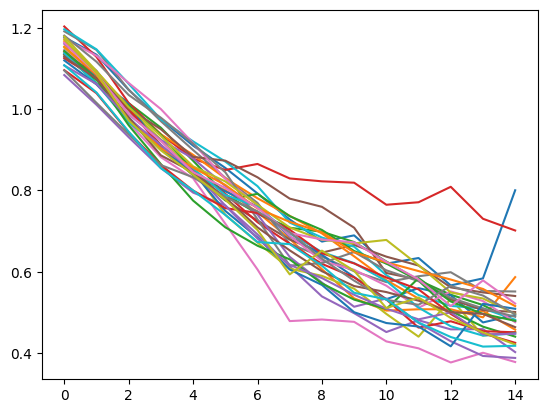

The 95% CI for threshold is 0.1 - 0.86375
The 95% CI for TSS is 0.565301511666119 - 0.8198652645415708

[Resource Summary for 30 bootstrapped LSTM models]
Total training time: 32.37 seconds
Max CPU memory used: 9924.48 MB
Max GPU memory used: 435.53 MB


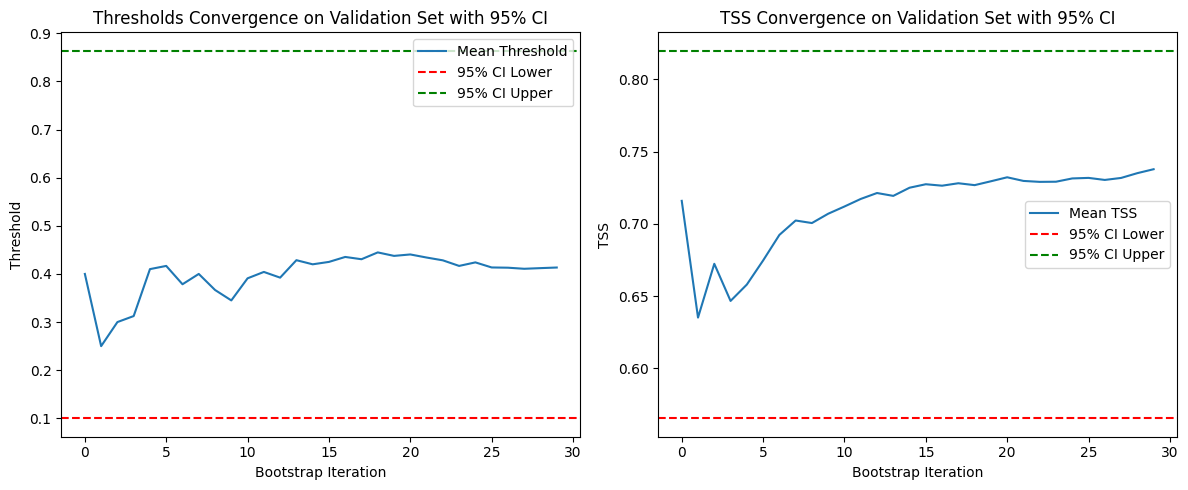

In [87]:
NRT_lead0_Mplus_24_whole = train_lstm()
NRT_lead0_Mplus_24_whole.train(NRT_nowcasting_obj_24.inputs_profile, NRT_nowcasting_obj_24.labels, "Mplus_train", pd.to_datetime('2012-09-14'), pd.to_datetime('2020-01-01'),n_epoch=15)

In [91]:
save_dir_nrt = ".\\LSTM_models\\Opr_nrtSHARP"

In [92]:
for i, model in enumerate(NRT_lead0_Mplus_24_whole.models):
    os.makedirs(save_dir_nrt, exist_ok=True)
    model_path = os.path.join(save_dir_nrt, f"NRT_lead0_Mplus_24_whole{i}.pth")
    torch.save(model.state_dict(), model_path)

Bootstrap iteration 1/30
Epoch 1, avg loss: 1.215464174747467
Epoch 2, avg loss: 1.1796510338783264
Epoch 3, avg loss: 1.1177862763404847
Epoch 4, avg loss: 1.048383927345276
Epoch 5, avg loss: 0.9908905625343323
Epoch 6, avg loss: 0.9037765622138977
Epoch 7, avg loss: 0.8792440295219421
Epoch 8, avg loss: 0.8079185009002685
Epoch 9, avg loss: 0.7916408181190491
Epoch 10, avg loss: 0.7177423894405365
Epoch 11, avg loss: 0.6581738501787185
Epoch 12, avg loss: 0.6626685678958892
Epoch 13, avg loss: 0.6165717363357544
Epoch 14, avg loss: 0.607950696349144
Epoch 15, avg loss: 0.5954168379306793
Bootstrap iteration 2/30
Epoch 1, avg loss: 1.178449320793152
Epoch 2, avg loss: 1.147228330373764
Epoch 3, avg loss: 1.098518192768097
Epoch 4, avg loss: 1.0264451801776886
Epoch 5, avg loss: 0.9603986859321594
Epoch 6, avg loss: 0.8965959131717682
Epoch 7, avg loss: 0.8298264861106872
Epoch 8, avg loss: 0.776057904958725
Epoch 9, avg loss: 0.7354451179504394
Epoch 10, avg loss: 0.6827098369598389


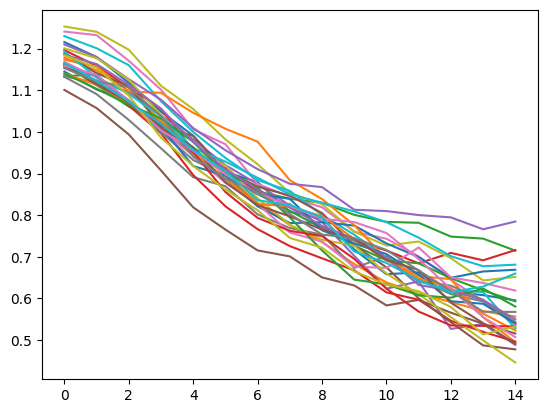

The 95% CI for threshold is 0.2 - 0.9
The 95% CI for TSS is 0.6238721804511279 - 0.8721804511278195

[Resource Summary for 30 bootstrapped LSTM models]
Total training time: 22.99 seconds
Max CPU memory used: 10898.39 MB
Max GPU memory used: 437.53 MB


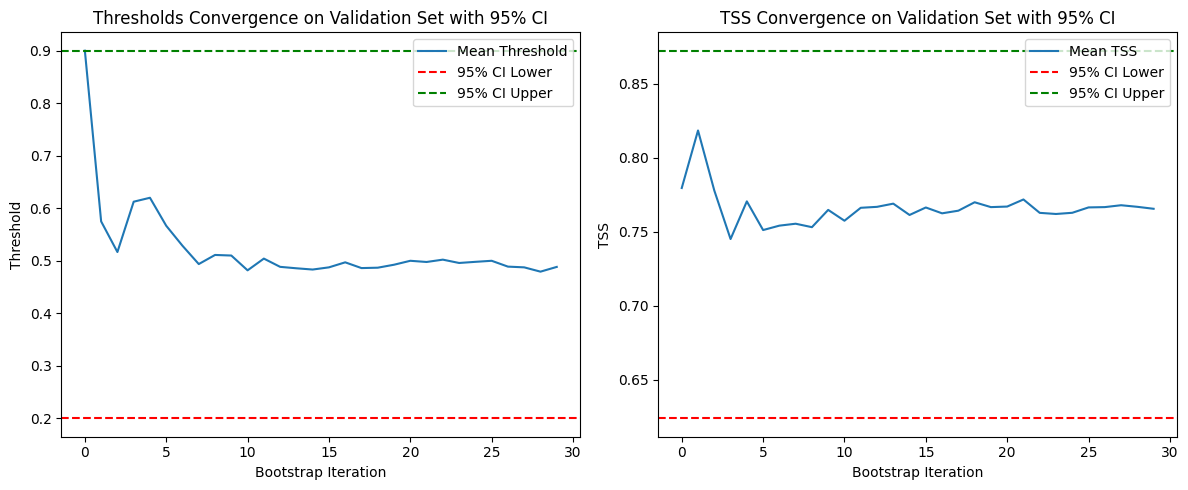

In [93]:
NRT_lead0_Mplus_12_whole = train_lstm()
NRT_lead0_Mplus_12_whole.train(NRT_nowcasting_obj_12.inputs_profile, NRT_nowcasting_obj_12.labels, "Mplus_train", pd.to_datetime('2010-01-01'), pd.to_datetime('2020-01-01'),n_epoch=15)

In [94]:
for i, model in enumerate(NRT_lead0_Mplus_12_whole.models):
    os.makedirs(save_dir_nrt, exist_ok=True)
    model_path = os.path.join(save_dir_nrt, f"NRT_lead0_Mplus_12_whole{i}.pth")
    torch.save(model.state_dict(), model_path)

Bootstrap iteration 1/30
Epoch 1, avg loss: 1.2498399530138289
Epoch 2, avg loss: 1.227573105267116
Epoch 3, avg loss: 1.185833181653704
Epoch 4, avg loss: 1.1500230772154671
Epoch 5, avg loss: 1.1045723131724767
Epoch 6, avg loss: 1.044352310044425
Epoch 7, avg loss: 0.9787257739475795
Epoch 8, avg loss: 0.9299093059131077
Epoch 9, avg loss: 0.880139946937561
Epoch 10, avg loss: 0.8313354849815369
Epoch 11, avg loss: 0.7935834356716701
Epoch 12, avg loss: 0.7597510388919285
Epoch 13, avg loss: 0.7182009475571769
Epoch 14, avg loss: 0.7147729481969561
Epoch 15, avg loss: 0.7113035236086164
Bootstrap iteration 2/30
Epoch 1, avg loss: 1.2386115108217512
Epoch 2, avg loss: 1.2242872544697352
Epoch 3, avg loss: 1.179244978087289
Epoch 4, avg loss: 1.137883254459926
Epoch 5, avg loss: 1.092247656413487
Epoch 6, avg loss: 1.0417766230446952
Epoch 7, avg loss: 0.9844787972314017
Epoch 8, avg loss: 0.9382144638470241
Epoch 9, avg loss: 0.887925752571651
Epoch 10, avg loss: 0.869594395160675
Ep

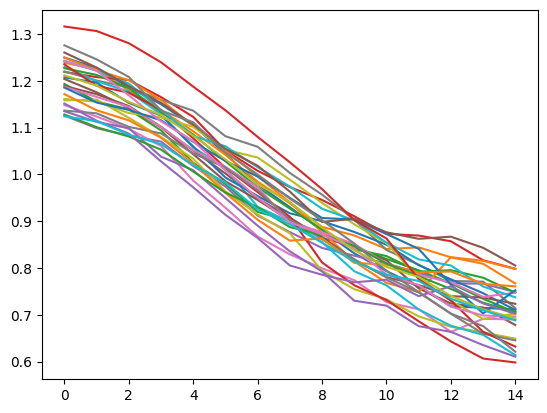

The 95% CI for threshold is 0.2 - 0.6912499999999998
The 95% CI for TSS is 0.5847008547008548 - 0.8569017094017094

[Resource Summary for 30 bootstrapped LSTM models]
Total training time: 15.10 seconds
Max CPU memory used: 10891.95 MB
Max GPU memory used: 443.53 MB


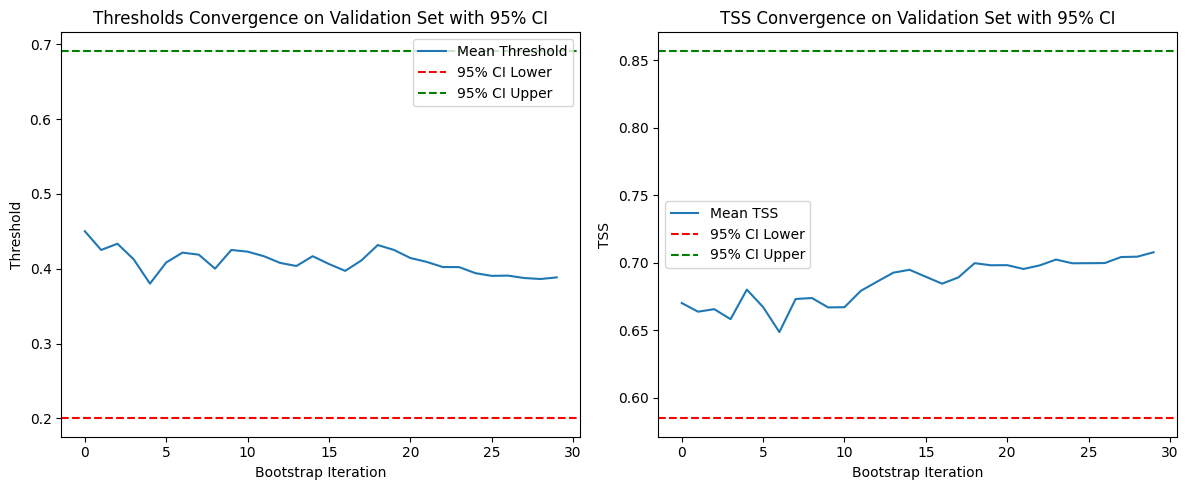

In [95]:
NRT_lead0_Mplus_6_whole = train_lstm()
NRT_lead0_Mplus_6_whole.train(NRT_nowcasting_obj_6.inputs_profile, NRT_nowcasting_obj_6.labels, "Mplus_train", pd.to_datetime('2012-09-14'), pd.to_datetime('2020-01-01'),n_epoch=15)

In [96]:
for i, model in enumerate(NRT_lead0_Mplus_6_whole.models):
    os.makedirs(save_dir_nrt, exist_ok=True)
    model_path = os.path.join(save_dir_nrt, f"NRT_lead0_Mplus_6_whole{i}.pth")
    torch.save(model.state_dict(), model_path)

In [98]:
tsss, hsss, pods, f1s, fars = GenScripts("NRT_lead0_Mplus_24_whole", NRT_lead0_Mplus_24_whole, NRT_nowcasting_obj_24, pd.to_datetime('2020-01-01'), pd.to_datetime('2022-01-01'), save_dir_nrt)

Positive: 73, Negative: 623
TSS: 0.54[0.08,0.81]
HSS: 0.29[0.06,0.47]
POD: 0.80[0.30,1.00]
F1: 0.40[0.19,0.55]
FAR: 0.26[0.14,0.55]


In [99]:
tsss, hsss, pods, f1s, fars = GenScripts("NRT_lead0_Mplus_12_whole", NRT_lead0_Mplus_12_whole, NRT_nowcasting_obj_12, pd.to_datetime('2020-01-01'), pd.to_datetime('2022-01-01'), save_dir_nrt)

Positive: 43, Negative: 483
TSS: 0.58[-0.06,0.82]
HSS: 0.26[-0.03,0.42]
POD: 0.84[0.16,1.00]
F1: 0.36[0.09,0.49]
FAR: 0.26[0.14,0.46]
